#Simple linear Regression

Q2) Salary_hike-> Build a prediction model for salary_hike

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Salary_Data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
data.shape

(30, 2)

In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9997b3d5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9997b3dae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9997b3eb90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9997b3cdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9997b3ccd0>],
 'means': []}

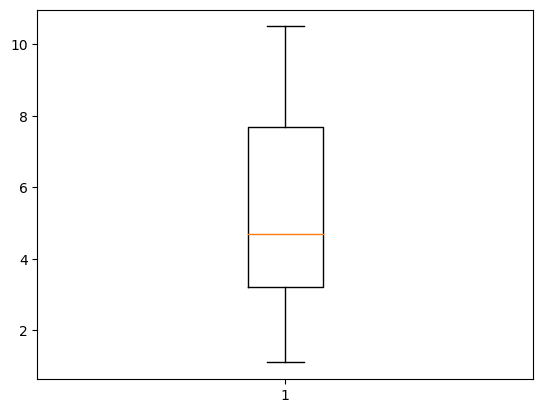

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(data["YearsExperience"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9997a25060>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9997a27520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f999772ebf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9997a26950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99976e7af0>],
 'means': []}

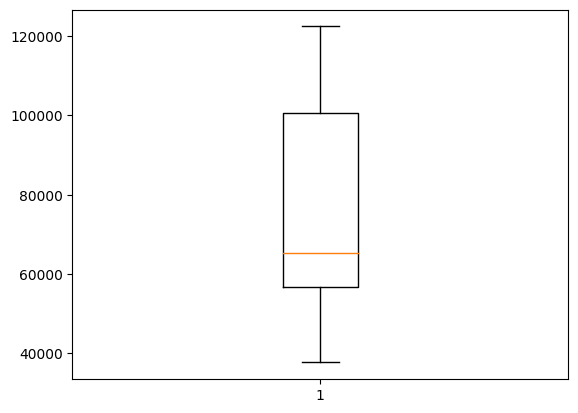

In [ ]:
plt.boxplot(data['Salary'])

<ipython-input-11-9990faf39d12>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

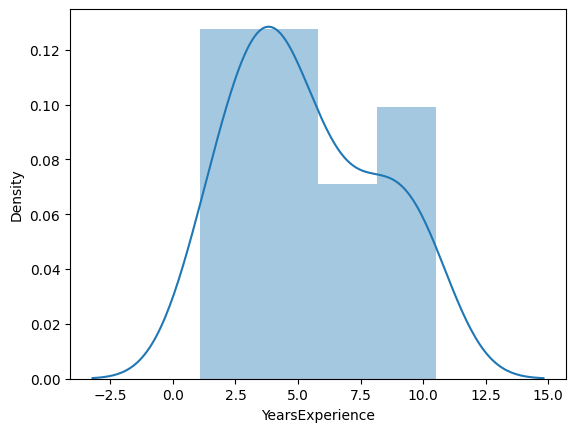

In [ ]:
import seaborn as sns
sns.distplot(data['YearsExperience'])

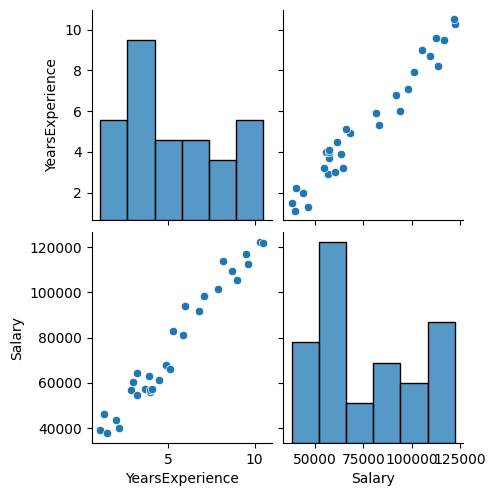

In [ ]:
sns.pairplot(data)

<Axes: >

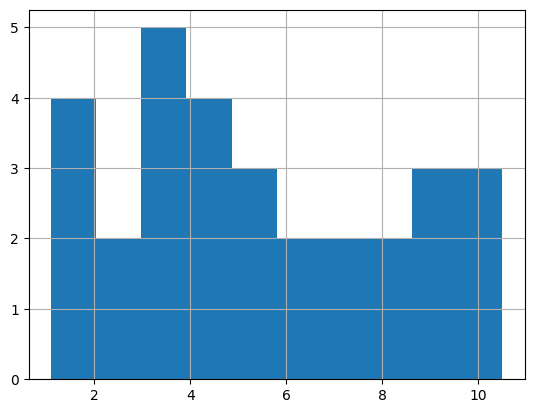

In [ ]:
data["YearsExperience"].hist()

<Axes: >

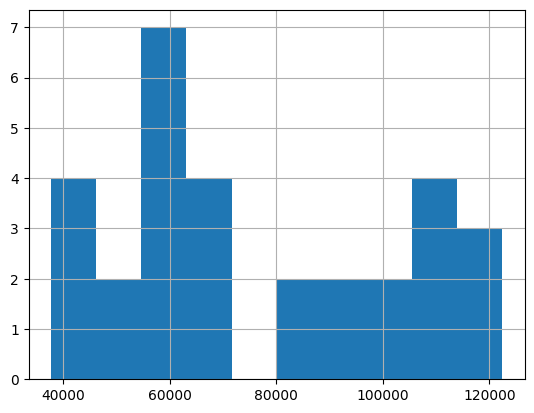

In [ ]:
data["Salary"].hist()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

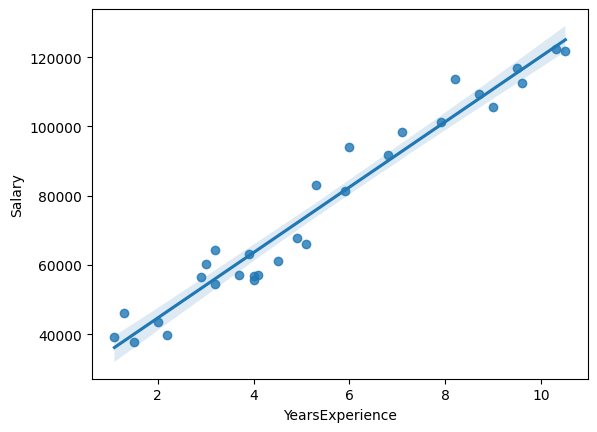

In [ ]:
sns.regplot(x="YearsExperience",y="Salary",data=data)

In [ ]:
data=data.rename({"YearsExperience":"Experience","Salary":"EmpSalary"},axis=1)

In [ ]:
data

,Experience,EmpSalary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#Correlation

In [ ]:
data.corr()

,Experience,EmpSalary
Experience,1.000000,0.978242
EmpSalary,0.978242,1.000000


#model Building

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("Experience~EmpSalary",data=data).fit()

In [ ]:
model.params

Intercept   -2.383161
EmpSalary    0.000101
dtype: float64

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Experience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        04:41:14   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
EmpSalary      0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""